<h3 align='center'> Analysis on Customer Personality using Clustering </h3>
<p align='center'><img src ="https://miro.medium.com/max/1400/0*ws2yHX44q3ejUxNj.jpeg" width="500" />

I always felt it is more important to have the right customers than just having customers.If your customers are loyal enough they will stay with you throughout,And the biggest problem most business face in today's  fast moving world is understanding one's own customers.Let me give an example:<br>
Suppose out of our 100 customers 30 customers only buy from us during festival or only during offers.Should we or should we not focus on these customers,the answer is yes and no.<br> we should focus on these customers mainly during festival instead of wasting resources with a wishful thinking that they may convert into regular customer( of course effort must be put towards but if every effort fails is better to focus on regular customers).Choosing those customers who regulary choose us is the way to develop a business. 

> Problem Statement
>
> Keeping in mind the varying personalities and behaviours of our customers.building a model which will segement our customers which will helps business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

### 1.Importing libraries and reading dataset

In [ ]:
url  ="https://raw.githubusercontent.com/shadowmoon697/customer_personality_analysis/main/marketing_campaign.csv"

In [ ]:
import pandas as pd
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
download = requests.get(url).content
data = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [ ]:
df = data.copy()

In [ ]:
df.shape

(2240, 29)

<p align='center'><img src ="https://github.com/Basavaraj-D/customer_personality_analysis/blob/main/About%20the%20data.png?raw=true" width="800"/>

For more information on the datset please [CLICK HERE](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Inference:
- we have 3 object types- in which one is a datetime which we will convert it into one
- remaining we have integer type
- we can drop the id column

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
unique = [feature for feature in df.columns if len(df[feature].unique())>0 and len(df[feature].unique())<100]
for feature in unique:
  print("{} has {} unique values : {} {}".format(feature,len(df[feature].unique()),df[feature].unique(),"\n"))

Year_Birth has 59 unique values : [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940] 

Education has 5 unique values : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] 

Marital_Status has 8 unique values : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] 

Kidhome has 3 unique values : [0 1 2] 

Teenhome has 3 unique values : [0 1 2] 

NumDealsPurchases has 15 unique values : [ 3  2  1  5  4 15  7  0  6  9 12  8 10 13 11] 

NumWebPurchases has 15 unique values : [ 8  1  2  5  6  7  4  3 11  0 27 10  9 23 25] 

NumCatalogPurchases has 14 unique values : [10  1  2  0  3  4  6 28  9  5  8  7 11 22] 

NumStorePurchases has 14 unique values : [ 4  2 10  6  7  0  3  8  5 12  9 13 11  1] 

NumWebVisitsMonth has 16 unique

In [ ]:
df.columns = df.columns.str.lower()
# let us convert all the columns into lowercase for easier analysis

### 2 .Missing values

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/ df.isnull().count()*100)
missing = pd.concat([total,percent],axis =1,keys=['total','percent'])
missing.head()

,total,percent
income,24,1.071429
year_birth,0,0.000000
numwebpurchases,0,0.000000
z_revenue,0,0.000000
z_costcontact,0,0.000000


- since we only have 24 missing data points we can drop it since it wont much impact on our model

In [ ]:
df = df.dropna()
print("we have {} missing values".format(df.isnull().sum().sum()))

we have 0 missing values


### 3.Numerical variables

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print("we have {} numerical features out of {}".format(len(numerical_features),len(df.columns)))

we have 25 numerical features out of 28


#### 3.1 - Discrete variables

- Any varible/feature that has a limited number of unique values in it is called as discrete variables,in our case we will select 25 features

In [ ]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("we have {} discrete features out of {} total features".format(len(discrete_features),len(df.columns)))

we have 16 discrete features out of 28 total features


In [ ]:
df[discrete_features].head()

,kidhome,teenhome,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,0,0,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,1,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,0,0,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1,0,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1,0,5,5,3,6,5,0,0,0,0,0,0,3,11,0


- instead of having two features for kids and teen we can have 1 feature which will be total number of kids
- similary we can combine all the purchases into one features
- same goes with whether accepted or not 

#### - Univariate analysis

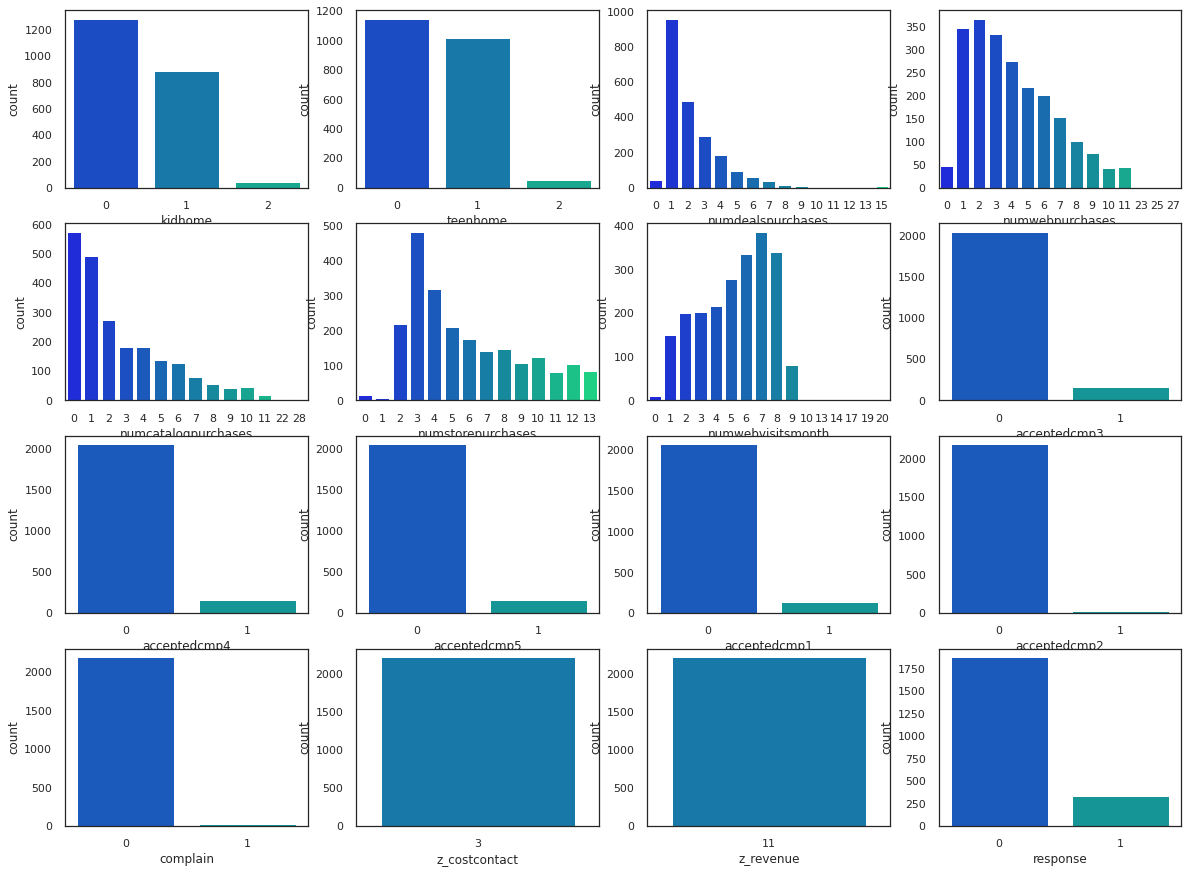

In [ ]:
fig,ax = plt.subplots(4,4,figsize=(20,15))
for variable, subplot in zip(discrete_features,ax.flatten()):
  sns.countplot(df[variable],ax=subplot,palette="winter")

> Inferences:

- most people either has no kids or has atleast one child
- most people purchased atleast one product via web and has the purchases increases the count decreases,which is understandable since the data is only till 2014
- people who did not purchased with the catalog as the reference are the highest
- most people bought via a store
- coming to campaign there is not much of a difference in each campaign,so we can also drop them or combine them
- majority did not had a single complaint
- people who did not responded are the highest


In [ ]:
df['total_kids'] = df['kidhome']+df['teenhome']
# this will combine both the kids into a single columns kids

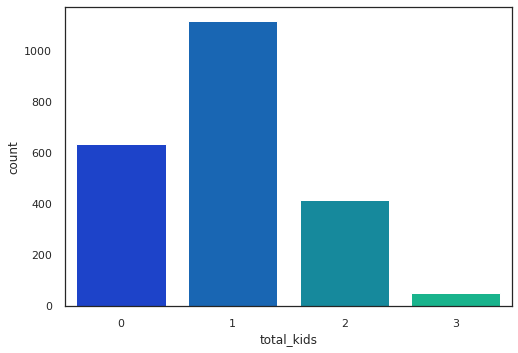

In [ ]:
sns.countplot(df['total_kids'],palette='winter');

- when we combine both teen and kid into one we can see that most people have atleast one child

- let us create a new feature for total_Accepted and total_purchase since as we can see there is not a huge difference between each so we are better off having a single feature rather than a bunch of em

In [ ]:
df['total_accep'] = df['acceptedcmp1'] + df['acceptedcmp2']+df['acceptedcmp3'] + df['acceptedcmp4']	+df['acceptedcmp5']	+df['response']

df['total_purchase'] = df['numdealspurchases']+df['numwebpurchases']+df['numcatalogpurchases']+df['numstorepurchases']

- let us drop all the irrelevant features

In [ ]:
df.drop(['kidhome','teenhome','numdealspurchases','numwebpurchases','numcatalogpurchases','numstorepurchases','numwebvisitsmonth','acceptedcmp3',
         'acceptedcmp4','acceptedcmp5','acceptedcmp1','acceptedcmp2','complain','z_costcontact','z_revenue','response'],axis=1,inplace=True)

In [ ]:
df.head()

,year_birth,education,marital_status,income,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,total_kids,total_accep,total_purchase
0,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,88,0,1,25
1,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,6,2,0,6
2,1965,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,21,42,0,0,21
3,1984,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,3,5,1,0,8
4,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,27,15,1,0,19


#### 3.2 - Continuos variables

- In contrast to discrete variables features that do not have  limited number of values in it is called continuos variables

In [ ]:
continuos_features = [feature for feature in numerical_features if feature not in discrete_features]
print("we have {} continuos features out of {} total features".format(len(continuos_features),len(df.columns)))

we have 9 continuos features out of 15 total features


In [ ]:
df[continuos_features].head()

,year_birth,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
0,1957,58138.0,58,635,88,546,172,88,88
1,1954,46344.0,38,11,1,6,2,1,6
2,1965,71613.0,26,426,49,127,111,21,42
3,1984,26646.0,26,11,4,20,10,3,5
4,1981,58293.0,94,173,43,118,46,27,15


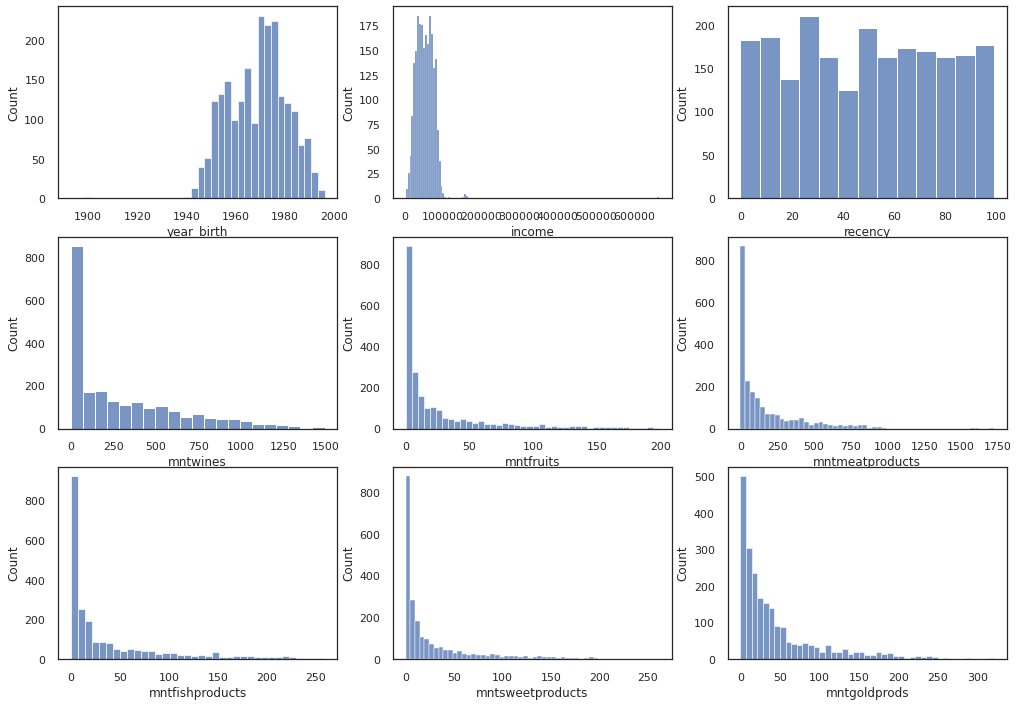

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(20,12))
for variable, subplot in zip(continuos_features,ax.flatten()):
  sns.histplot(df[variable],ax=subplot)

Inferences:

- year and income has outliers in it
- 30 days seems to be the longest time since the customers last purchase
- instead of having so many columns on amount spent we can combine all the features into one feature which will have the total spending of a customer
- we can also create a new age feature which will be easier to remove outliers

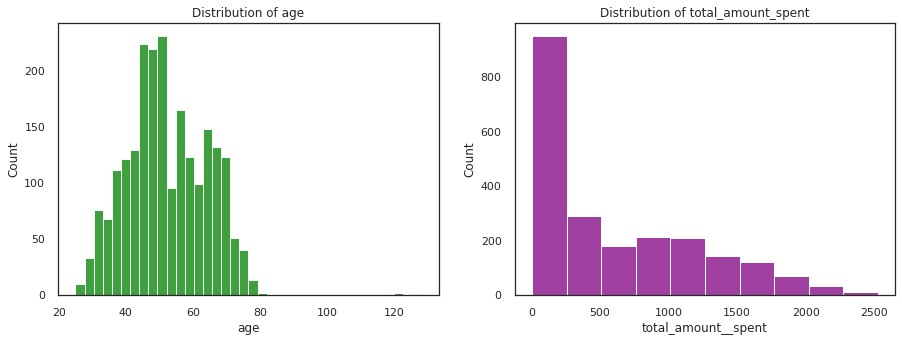

In [ ]:
df['age'] = 2021 -df['year_birth']
df['total_amount__spent']= df['mntwines'] + df['mntfruits'] +df['mntmeatproducts'] +df["mntfishproducts"] +df['mntsweetproducts']+df['mntgoldprods']
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df['age'],color='green')
plt.title('Distribution of age')

plt.subplot(1,2,2)
sns.histplot(df['total_amount__spent'],color='purple',bins=10)
plt.title('Distribution of total_amount_spent');

- let us drop all the unnecessary features

In [ ]:
df.drop(['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods'],axis=1,inplace=True)

In [ ]:
df.head()

,year_birth,education,marital_status,income,dt_customer,recency,total_kids,total_accep,total_purchase,age,total_amount__spent
0,1957,Graduation,Single,58138.0,04-09-2012,58,0,1,25,64,1617
1,1954,Graduation,Single,46344.0,08-03-2014,38,2,0,6,67,27
2,1965,Graduation,Together,71613.0,21-08-2013,26,0,0,21,56,776
3,1984,Graduation,Together,26646.0,10-02-2014,26,1,0,8,37,53
4,1981,PhD,Married,58293.0,19-01-2014,94,1,0,19,40,422


### 4.Categorical variables

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
print("we have {} continuos features out of {} features".format(len(categorical_features),len(df.columns)))

we have 3 continuos features out of 11 features


In [ ]:
df[categorical_features].head()

,education,marital_status,dt_customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014


- as we can see dt_customer is a datetime variable we will convert it into datetime

In [ ]:
df["dt_customer"] = pd.to_datetime(df["dt_customer"]).dt.date
print("The newest date is:",max(df["dt_customer"]))
print("The oldest date is:",min(df["dt_customer"]))

The newest date is: 2014-12-06
The oldest date is: 2012-01-08


In [ ]:
df.dt_customer.dtype

dtype('O')

- let us create a function which will show how many days has it been since the customer started shopping from us

In [ ]:
from datetime import date
days = []
d1 = max(df['dt_customer'])
for i in df['dt_customer']:
    delta = d1 - i
    days.append(delta.days)
df["total_days"] = days
df["total_days"] = pd.to_numeric(df["total_days"], errors="coerce")

- when we were checking the unique values in the column we saw that in education and married most of the data was repeated let us see it once again

In [ ]:
print("education      :",df.education.unique())
print("marital_status :",df.marital_status.unique())

education      : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
marital_status : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


- let us create new features for both education and marital status

In [ ]:
df['marital_status'] = df['marital_status'].replace({"Together":"Married", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Alone":"Single",})

df['education'] = df['education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

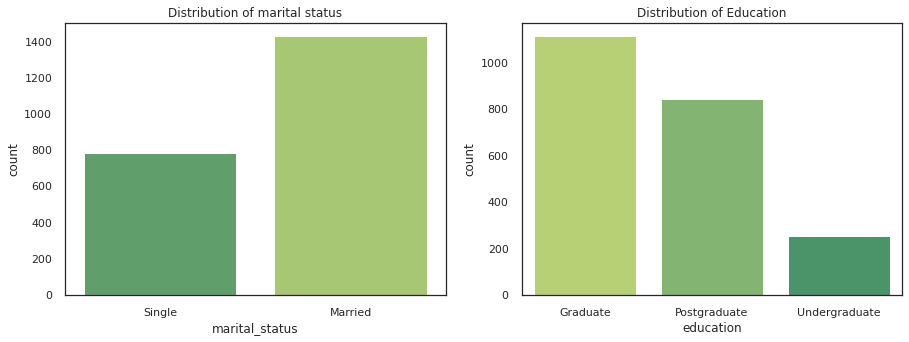

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['marital_status'],palette ='summer')
plt.title('Distribution of marital status')

plt.subplot(1,2,2)
sns.countplot(df['education'],palette ='summer_r')
plt.title('Distribution of Education');

Inferences:
- most people are married in our dataset
- most peoples are graduates in our dataset

- let us create a new column which will have the family members and if a person in a house is a parent

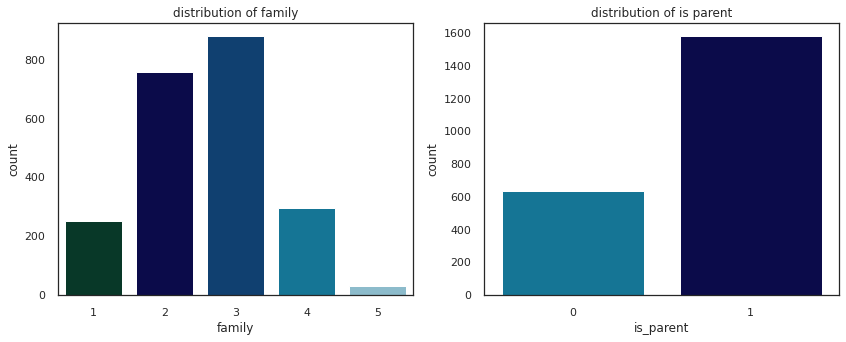

In [ ]:
df['family'] = df['marital_status'].replace({'Single':1,"Married":2}) + df['total_kids']
# we will create a new column which will contain all the total members in an household

df['is_parent'] = np.where(df.total_kids>0,1,0)
# this feature will choose 1 if a family has a parent in it else 0

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(df['family'],palette='ocean')
plt.title('distribution of family')

plt.subplot(1,2,2)
sns.countplot(df['is_parent'],palette='ocean_r')
plt.title('distribution of is parent');

Inferences:
- as we can see most people in an household are a parent
- most family has atleast 2 and 3 members in it

- Before proceeding further let us delete all the features which will not be useful for our further analysis

In [ ]:
df.drop(['year_birth','dt_customer','recency',],axis=1,inplace=True)

In [ ]:
df.head()

,education,marital_status,income,total_kids,total_accep,total_purchase,age,total_amount__spent,total_days,family,is_parent
0,Graduate,Single,58138.0,0,1,25,64,1617,971,1,0
1,Graduate,Single,46344.0,2,0,6,67,27,125,3,1
2,Graduate,Married,71613.0,0,0,21,56,776,472,2,0
3,Graduate,Married,26646.0,1,0,8,37,53,65,3,1
4,Postgraduate,Married,58293.0,1,0,19,40,422,321,3,1


### 5. Outlier Removal

- we already saw during our initial analysis there were some outliers present in age and income

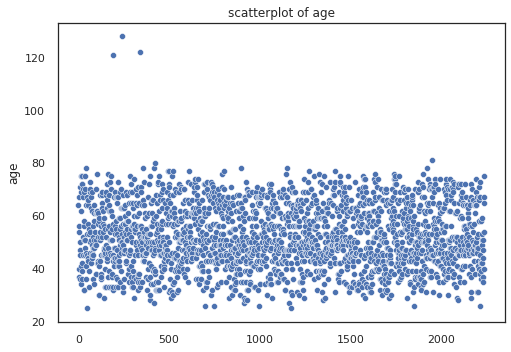

In [ ]:
sns.scatterplot(data =df['age'])
plt.title('scatterplot of age');

In [ ]:
df[df['age']>90]

,education,marital_status,income,total_kids,total_accep,total_purchase,age,total_amount__spent,total_days,family,is_parent
192,Undergraduate,Single,36640.0,1,0,6,121,65,436,2,1
239,Undergraduate,Single,60182.0,1,0,4,128,22,203,2,1
339,Postgraduate,Married,83532.0,0,1,15,122,1853,436,2,0


- as we can see we only have 3 datapoints greater than 90 we can drop them 

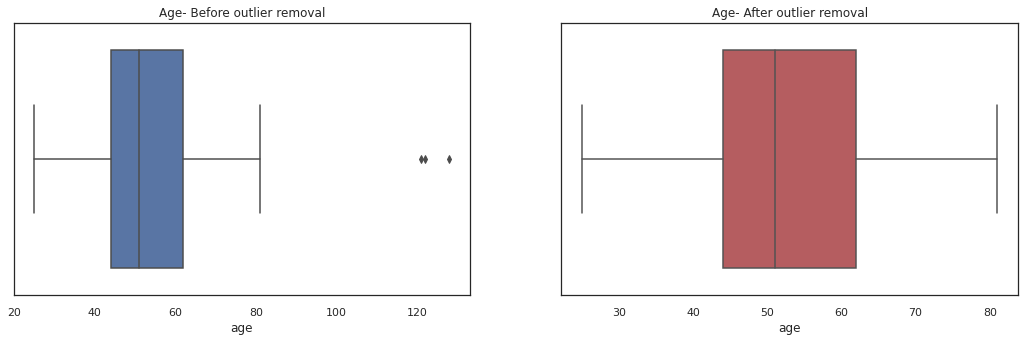

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(df['age'])
plt.title("Age- Before outlier removal");

df = df.drop(df[df['age']>90].index)  # to remove the outliers

plt.subplot(1,2,2)
sns.boxplot(df['age'],color='r')
plt.title('Age- After outlier removal');

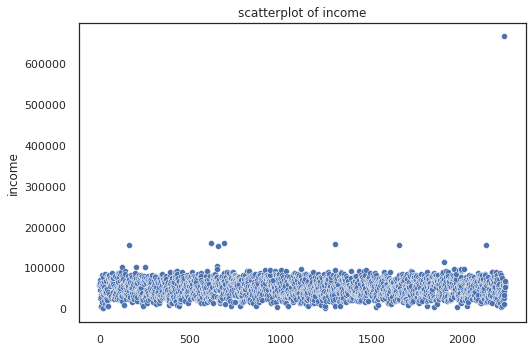

In [ ]:
sns.scatterplot(data = df['income'])
plt.title('scatterplot of income');

- we can remove data either data after 150000 or after 600000, we will go with 600000 and let some outliers be 

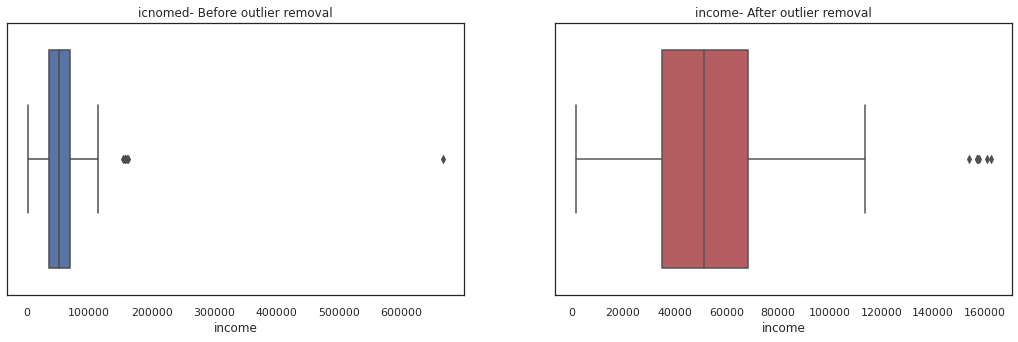

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(df['income'])
plt.title("icnomed- Before outlier removal");

df = df.drop(df[df['income']>600000].index)  # to remove the outliers

plt.subplot(1,2,2)
sns.boxplot(df['income'],color='r')
plt.title('income- After outlier removal');

### 6. Correlation

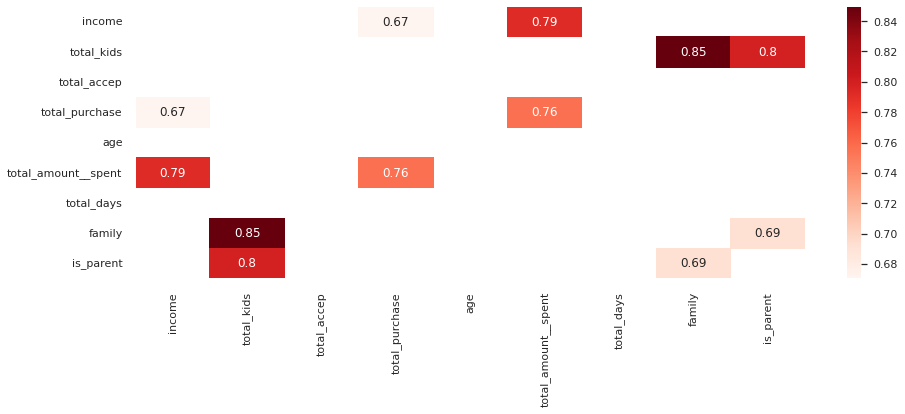

In [ ]:
pos_corrmat = df.corr()
filtereddf = pos_corrmat[((pos_corrmat >= .5) & (pos_corrmat !=1.000))]
plt.figure(figsize=(15,5))
sns.heatmap(filtereddf, annot=True, cmap="Reds")
plt.title('Positive correlation matrix')
plt.show()

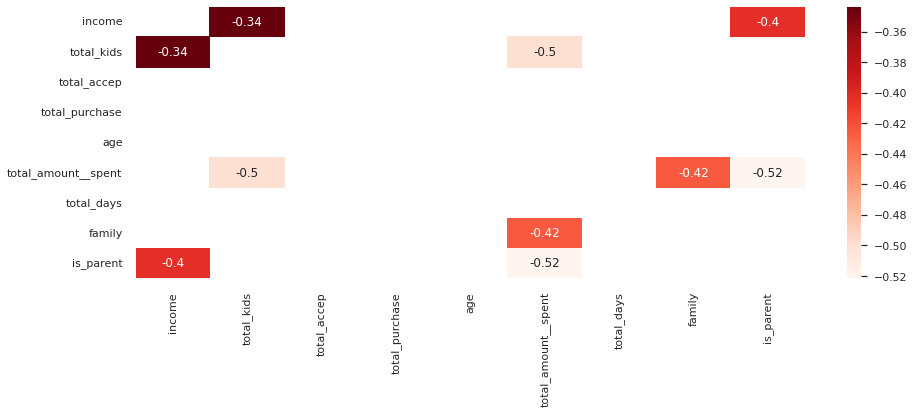

In [ ]:
neg_corrmat = df.corr()
filtereddf = neg_corrmat[((neg_corrmat <-.3) & (neg_corrmat !=1.000))]
plt.figure(figsize=(15,5))
sns.heatmap(filtereddf, annot=True, cmap="Reds")
plt.title('Negative correlation matrix')
plt.show()

### 7. Label Encoding and Standardizing

In [ ]:
object_feat = [feature for feature in df.columns if df[feature].dtype == "O"]
df[object_feat].head()

,education,marital_status
0,Graduate,Single
1,Graduate,Single
2,Graduate,Married
3,Graduate,Married
4,Postgraduate,Married


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in object_feat:
  df[i] = df[[i]].apply(le.fit_transform)

In [ ]:
df.head()

,education,marital_status,income,total_kids,total_accep,total_purchase,age,total_amount__spent,total_days,family,is_parent
0,0,1,58138.0,0,1,25,64,1617,971,1,0
1,0,1,46344.0,2,0,6,67,27,125,3,1
2,0,0,71613.0,0,0,21,56,776,472,2,0
3,0,0,26646.0,1,0,8,37,53,65,3,1
4,1,0,58293.0,1,0,19,40,422,321,3,1


##### Why standardize?

- standardizing makes the mean 0 and variance as 1 which in turn makes all the data consistent throughout
- Standardized data takes less computational power than non-standardized one
- It reduces the bias if present in the dataset.
> it is not mandatory that we must always scale the data but since we are working on clustering where distance between the datapoints are considered it is better to standardize the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df2 = scaler.fit_transform(df)

In [ ]:
df2 = pd.DataFrame(df2,columns = df.columns)
# converting the transformed data into dataframe
df2.head()

,education,marital_status,income,total_kids,total_accep,total_purchase,age,total_amount__spent,total_days,family,is_parent
0,-0.893586,1.349603,0.287105,-1.264598,0.617244,1.317945,1.018352,1.676245,1.973583,-1.758359,-1.581139
1,-0.893586,1.349603,-0.260882,1.404572,-0.502808,-1.159273,1.274785,-0.963297,-1.665144,0.449070,0.632456
2,-0.893586,-0.740959,0.913196,-1.264598,-0.502808,0.796425,0.334530,0.280110,-0.172664,-0.654644,-1.581139
3,-0.893586,-0.740959,-1.176114,0.069987,-0.502808,-0.898513,-1.289547,-0.920135,-1.923210,0.449070,0.632456
4,0.571657,-0.740959,0.294307,0.069987,-0.502808,0.535666,-1.033114,-0.307562,-0.822130,0.449070,0.632456


### K-Means Clustering

What is k-means clustering?
<p align='center'><img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png" width='500'/>

k-means clustering is an unsupervised ml algorithm and steps involved are:
- randomly select k points(also called centroids)
- assign the values to its nearest centroid
- calculate the distance between points and centroid
- iterate this process till there is no change in any of the clusters

In [ ]:
scaled_df= df2.copy()

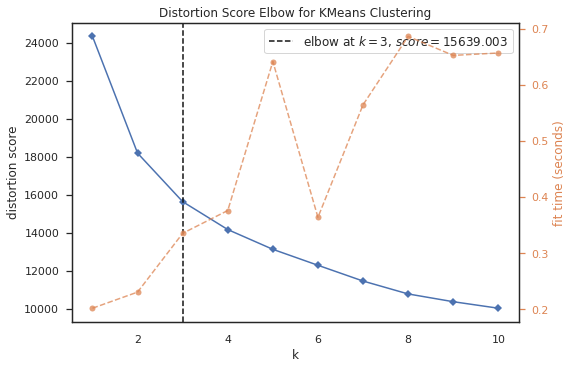

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(scaled_df)
visualizer.show();

# elbow method is one of the methods that is used to calculate the k-value

- as we can see 3 is the optimal clusters

### Model Building

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)
pred_kmeans = kmeans.fit_predict(scaled_df)

- let us create a new feature in the original dataframe for easier analysis

In [ ]:
df['pred_kmeans'] = pred_kmeans+1
df.head()

,education,marital_status,income,total_kids,total_accep,total_purchase,age,total_amount__spent,total_days,family,is_parent,pred_kmeans
0,0,1,58138.0,0,1,25,64,1617,971,1,0,2
1,0,1,46344.0,2,0,6,67,27,125,3,1,1
2,0,0,71613.0,0,0,21,56,776,472,2,0,2
3,0,0,26646.0,1,0,8,37,53,65,3,1,1
4,1,0,58293.0,1,0,19,40,422,321,3,1,3


### Analysis

In [ ]:
personal = df[['education','marital_status','total_kids','total_accep','family','is_parent']]

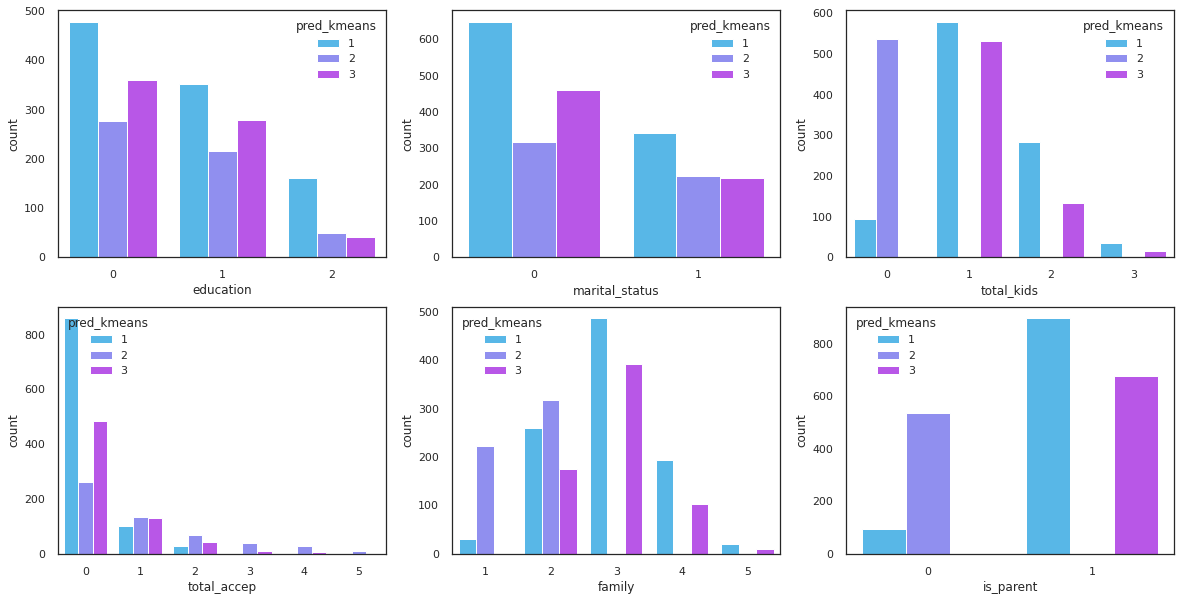

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('darkgrid')
for variable, subplot in zip(personal,ax.flatten()):
  sns.countplot(df[variable],hue=df['pred_kmeans'],ax=subplot,palette='cool')

In [ ]:
other = df[['income','total_purchase','age','total_amount__spent','total_days']]

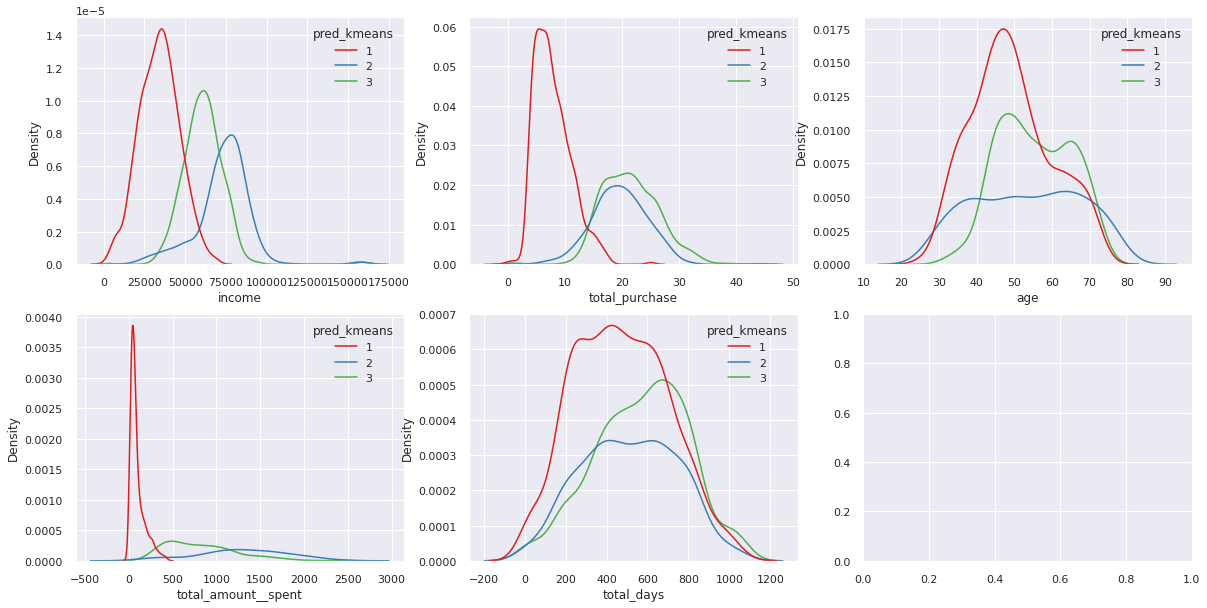

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('darkgrid')
for variable, subplot in zip(other,ax.flatten()):
  sns.kdeplot(data= df,x=variable,hue='pred_kmeans',ax=subplot,palette='Set1')

### Report

<p align='center'><img src ="https://github.com/Basavaraj-D/customer_personality_analysis/blob/main/customer%20segmentation.png?raw=true" width = "800"/>

- let us also do a PCA on our data and check if the results will be any better

In [ ]:
new_df = df2.copy()

In [ ]:
new_df.head()

,education,marital_status,income,total_kids,total_accep,total_purchase,age,total_amount__spent,total_days,family,is_parent
0,-0.893586,1.349603,0.287105,-1.264598,0.617244,1.317945,1.018352,1.676245,1.973583,-1.758359,-1.581139
1,-0.893586,1.349603,-0.260882,1.404572,-0.502808,-1.159273,1.274785,-0.963297,-1.665144,0.449070,0.632456
2,-0.893586,-0.740959,0.913196,-1.264598,-0.502808,0.796425,0.334530,0.280110,-0.172664,-0.654644,-1.581139
3,-0.893586,-0.740959,-1.176114,0.069987,-0.502808,-0.898513,-1.289547,-0.920135,-1.923210,0.449070,0.632456
4,0.571657,-0.740959,0.294307,0.069987,-0.502808,0.535666,-1.033114,-0.307562,-0.822130,0.449070,0.632456


### PCA and Agglomerative Clustering

Pca : Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.<br>
PCA can be particularly useful when we have a dataset where multi collinearity exits between features.

Agglomerative Clustering: this is also called as bottom-up-approach,this approcah treats all the data points as a single cluster and then continues to add each cluster one by one by their distance,until we have only one huge cluster which will contain all the datapoints

<p align='center'><img src ="https://media.geeksforgeeks.org/wp-content/uploads/20190508025311/781ff66c-b380-4a78-af25-80507ed6ff26-300x300.png" width ='400'/>


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(new_df)
PCA_df = pd.DataFrame(pca.transform(new_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.706491e-17,1.961654,-3.939510,-1.596086,-0.330519,1.277677,5.336469
col2,2212.0,-3.111837e-17,1.325216,-4.264995,-0.825638,0.051201,0.933581,4.397893
col3,2212.0,-3.535950e-17,1.052093,-2.582650,-0.744049,0.100524,0.687611,3.329036


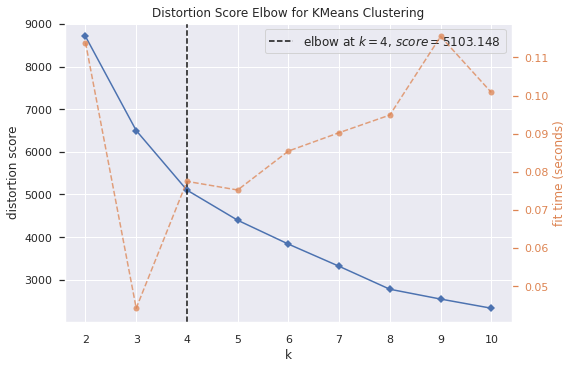

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

- as we can see the optimal clusters when we do PCA is 4

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model_agg = AgglomerativeClustering(n_clusters=4)
pred_agg = model_agg.fit_predict(new_df)

In [ ]:
df['pred_agg'] = pred_agg+1
df.drop('pred_kmeans',axis=1,inplace=True)
df.head()

,education,marital_status,income,total_kids,total_accep,total_purchase,age,total_amount__spent,total_days,family,is_parent,pred_agg
0,0,1,58138.0,0,1,25,64,1617,971,1,0,1
1,0,1,46344.0,2,0,6,67,27,125,3,1,3
2,0,0,71613.0,0,0,21,56,776,472,2,0,1
3,0,0,26646.0,1,0,8,37,53,65,3,1,2
4,1,0,58293.0,1,0,19,40,422,321,3,1,4


- since everything is almost the same we will plot the data but this time we will exclude total_accep and total_purchase(since amount_spent can be used)

In [ ]:
personal_feat = df[['education','marital_status','total_kids','family','is_parent']]
other_feat = df[['income','age','total_amount__spent','total_days']]

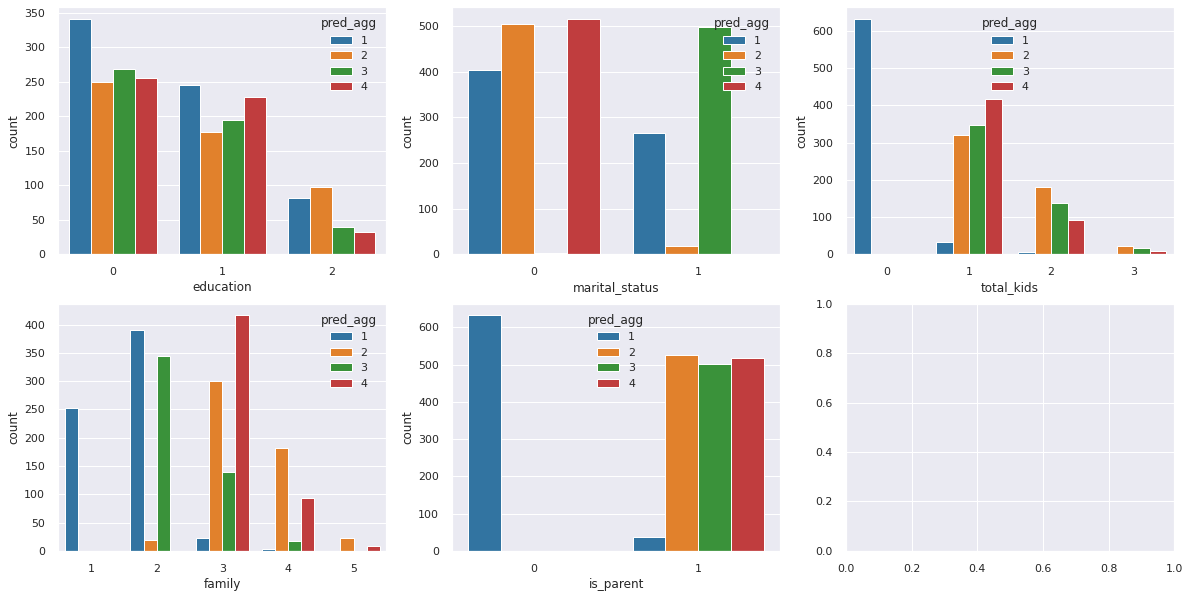

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('darkgrid')
for variable, subplot in zip(personal_feat,ax.flatten()):
  sns.countplot(df[variable],hue=df['pred_agg'],ax=subplot,palette='tab10')

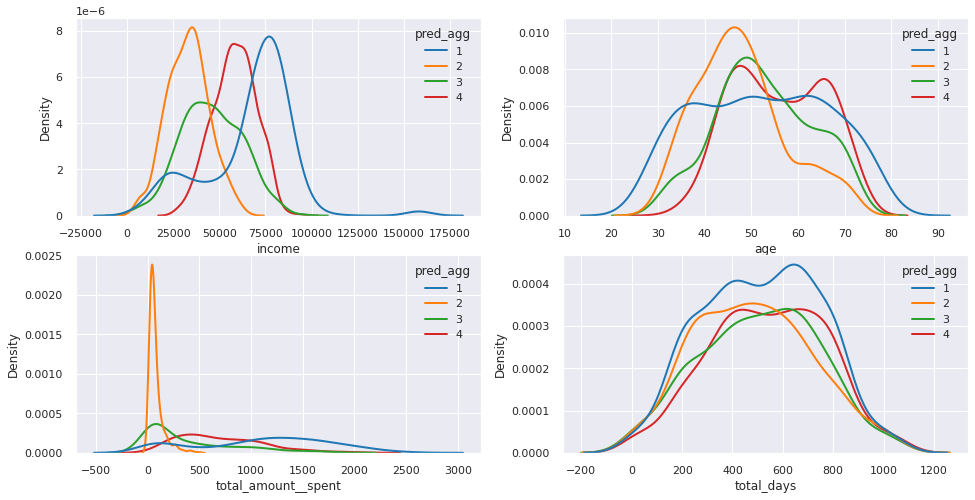

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(16,8))
sns.set_theme(style="white")
for variable, subplot in zip(other_feat,ax.flatten()):
  sns.kdeplot(data=df,x=variable,hue='pred_agg',ax=subplot,palette='tab10',linewidth=2)

### Report

<p align='center'><img src ="https://github.com/Basavaraj-D/customer_personality_analysis/blob/main/agg%20report.png?raw=true" width='700'/>

### Conclusion

In this project we did an analysis on data on customers,first we used only k-means and created a report,following which we did a PCA on our data and applied agglomerative clustering algorithm and created a report consisting of customer's income,age,family,spending etc. which can be used in taking better decisions pertaining our customers.